# IBM Develope Skill Networks

# Softmax Classifier 1D

In [3]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader 

In [4]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [5]:
# set the random seed
torch.manual_seed(0)

# Make some Data

In [6]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

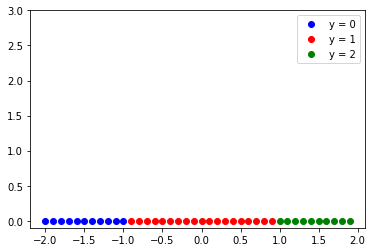

In [7]:
data_set = Data()
data_set.x
plot_data(data_set)

# Build a Softmax Classifier

In [8]:
model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

# Train the Model

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
trainloader = DataLoader(dataset = data_set, batch_size=5)

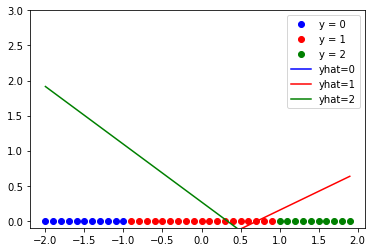

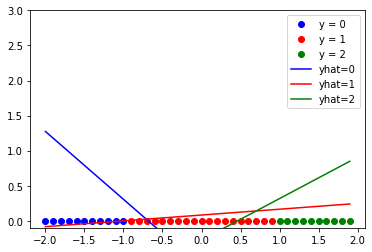

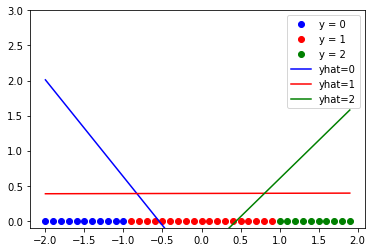

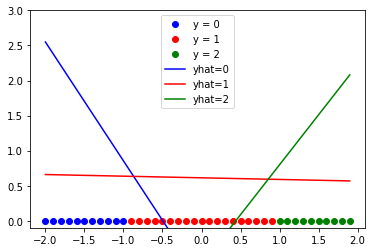

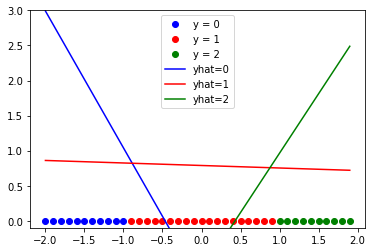

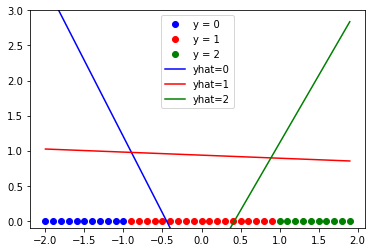

In [10]:
# Train the model
LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            plot_data(data_set, model)
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()

train_model(300)

# Analyze Results

In [11]:
# Make the prediction
z = model(data_set.x)
_, yhat = z.max(1)
print('yhat=', yhat)

yhat= tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [17]:
print(z.max(1)) # return 2 tensor with values and indexes

torch.return_types.max(
values=tensor([3.7019, 3.4652, 3.2285, 2.9918, 2.7551, 2.5184, 2.2818, 2.0451, 1.8084,
        1.5717, 1.3350, 1.1081, 1.1032, 1.0982, 1.0933, 1.0884, 1.0835, 1.0786,
        1.0737, 1.0688, 1.0638, 1.0589, 1.0540, 1.0491, 1.0442, 1.0393, 1.0344,
        1.0294, 1.0245, 1.0247, 1.2369, 1.4491, 1.6613, 1.8735, 2.0857, 2.2979,
        2.5101, 2.7223, 2.9344, 3.1466], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


In [18]:
# Print the accuracy
correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

The accuracy:  0.975


In [19]:
# Convert output to probality
Softmax_fn = nn.Softmax(dim=-1)

In [21]:
Probability = Softmax_fn(z)

In [22]:
for i in range(3):
    print("probability of class {} isg given by  {}".format(i, Probability[0,i]) )

probability of class 0 isg given by  0.9267546534538269
probability of class 1 isg given by  0.07310983538627625
probability of class 2 isg given by  0.00013548211427405477
